In [ ]:
# In this checkpoint, we are going to practice consuming public APIs through the NASA public APIs portal.

# Portal description : The objective of this portal is to make NASA data, including imagery, eminently accessible to application developers and data professionals. Before starting to use its APIs endpoints, it's mandatory that you generate your API KEY and store it somewhere for later use. The API key acts as the user identifier when requesting the API. To get your KEY, fill in the provided form with your personal information, and then we shall receive an email containing your personal API KEY.

# ➡️ NASA API PORTAL

# https://i.imgur.com/hisTmpk.png




# Instructions

# Go to the NASA API portal and generate your API KEY
# Import the requests package and store your API KEY in variable
# Go back to portal website and click on 'browse APIs'
# Click on the first dropdown menu, named 'APOD' and read its documentation
# Follow the provided documentation to ask the API endpoint for the astronomy picture of the day. Get then display the image on your notebook.
# Go through the list of the provided API endpoints once again and select 'Astronomy Picture of the Day' option. Store the results in a pandas dataframe
# Do the necessary data pre-processing tasks on the previous result in order to get a clean dataframe with the following columns :
# Asteroid ID
# Asteroid name
# The Minimal estimated diameter in Kilometre
# Absolute_magnitude
# Relative_velocity(km/s)
# Try to export the new dataframe into a CSV file and share it with your colleagues

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://api.nasa.gov/planetary/apod?api_key=1zpcCly1PIPrtnl1CzsRhJr2NQXViSiYNmq0Mdn0'
ds = requests.get(url).json()['url']
ds

'https://apod.nasa.gov/apod/image/2407/Crab_MultiChandra_960.jpg'

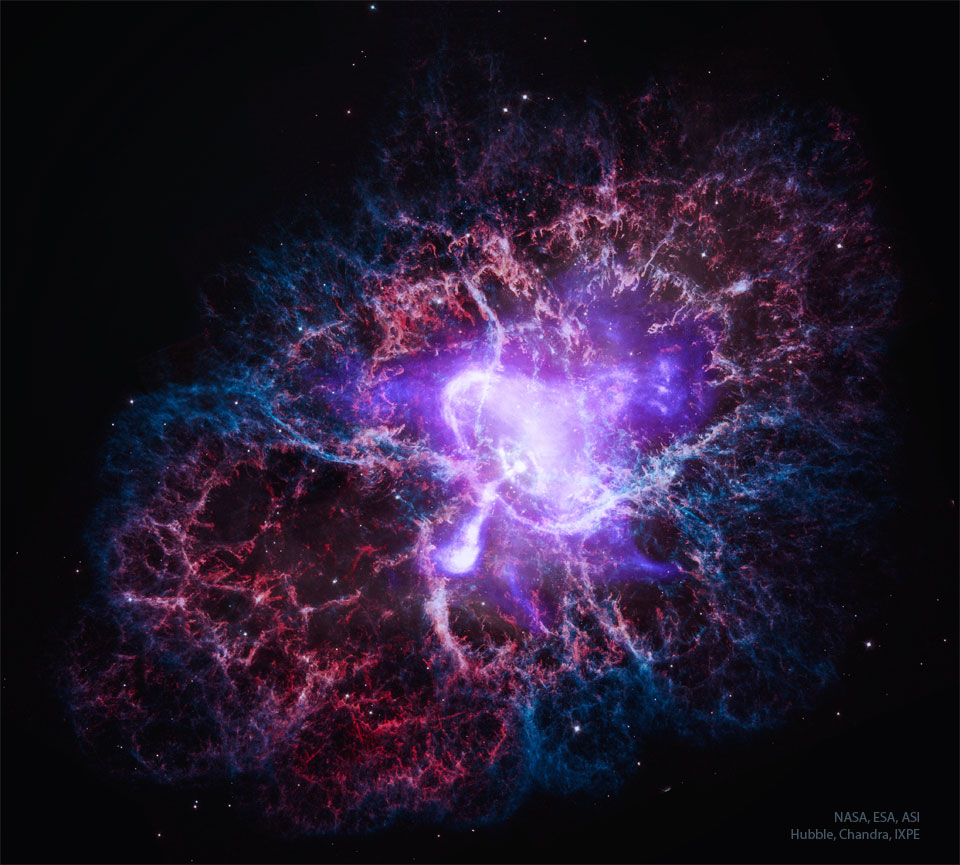

In [3]:
from IPython.display import Image
Image(ds)

In [4]:
url = 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-13&api_key=1zpcCly1PIPrtnl1CzsRhJr2NQXViSiYNmq0Mdn0'
ds = requests.get(url).json()
ds

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-13&end_date=2015-09-19&detailed=false&api_key=1zpcCly1PIPrtnl1CzsRhJr2NQXViSiYNmq0Mdn0',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-01&end_date=2015-09-07&detailed=false&api_key=1zpcCly1PIPrtnl1CzsRhJr2NQXViSiYNmq0Mdn0',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-13&detailed=false&api_key=1zpcCly1PIPrtnl1CzsRhJr2NQXViSiYNmq0Mdn0'},
 'element_count': 106,
 'near_earth_objects': {'2015-09-11': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2162162?api_key=1zpcCly1PIPrtnl1CzsRhJr2NQXViSiYNmq0Mdn0'},
    'id': '2162162',
    'neo_reference_id': '2162162',
    'name': '162162 (1999 DB7)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2162162',
    'absolute_magnitude_h': 19.99,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2670268771,
      'estimated_diameter_max': 0.5970902489},
 

In [ ]:
ID = ds['near_earth_objects']['2015-09-07'][0]['id']
ID

'2440012'

In [ ]:
Names = ds['near_earth_objects']['2015-09-07'][0]['name']
Names

'440012 (2002 LE27)'

In [ ]:
km = ds['near_earth_objects']['2015-09-07'][0]['estimated_diameter']['kilometers']['estimated_diameter_min']
km

0.3180936332

In [ ]:
Abs_Mag = ds['near_earth_objects']['2015-09-07'][0]['absolute_magnitude_h']
Abs_Mag

19.61

In [ ]:
rel_vel = ds['near_earth_objects']['2015-09-07'][0]['close_approach_data'][0]['relative_velocity']['kilometers_per_second']
rel_vel

'1.1630843052'

In [ ]:
ids = []
names = []
km = []
abs_mag = []
rel_vel = []

dates = ['2015-09-07', '2015-09-08', '2015-09-09', '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13']

for date in dates:
    for i in range(5):
        ids.append(ds['near_earth_objects'][date][i]['id'])
        names.append(ds['near_earth_objects'][date][i]['name'])
        km.append(ds['near_earth_objects'][date][i]['estimated_diameter']['kilometers']['estimated_diameter_min'])
        abs_mag.append(ds['near_earth_objects'][date][i]['absolute_magnitude_h'])
        rel_vel.append(ds['near_earth_objects'][date][i]['close_approach_data'][0]['relative_velocity']['kilometers_per_second'])


In [ ]:
df = pd.DataFrame()
df['Id'] = ids
df['Names'] = names
df['Estimated Diated(km/s)'] = km
df['Absolute Magnitude'] = abs_mag
df['Relative Velocity'] = rel_vel

df

,Id,Names,Estimated Diated(km/s),Absolute Magnitude,Relative Velocity
0,2440012,440012 (2002 LE27),0.318094,19.61,1.1630843052
1,3713989,(2015 FC35),0.098754,22.15,8.7635328327
2,3726788,(2015 RG2),0.012149,26.70,8.0871658927
3,3727036,(2015 RL35),0.014607,26.30,3.5169616174
4,3727179,(2015 RH36),0.050647,23.60,7.2717612888
5,2465633,465633 (2009 JR5),0.217048,20.44,18.1279360862
6,3426410,(2008 QV11),0.143402,21.34,19.7498128142
7,3553060,(2010 XT10),0.013322,26.50,19.1530348886
8,3726710,(2015 RC),0.036691,24.30,19.486643553
9,3727181,(2015 RO36),0.068953,22.93,15.8091452192


In [ ]:
df.to_csv('nasa_data1.csv')